In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
flood_otsu = gpd.read_file('flooded_vec_newv2.shp')

In [4]:
taluk = gpd.read_file(r'C:\Users\nw431\OneDrive - University of Exeter\Individual Project\Kerala_Boundaries\Talek Level\Taluk_Level.shp')

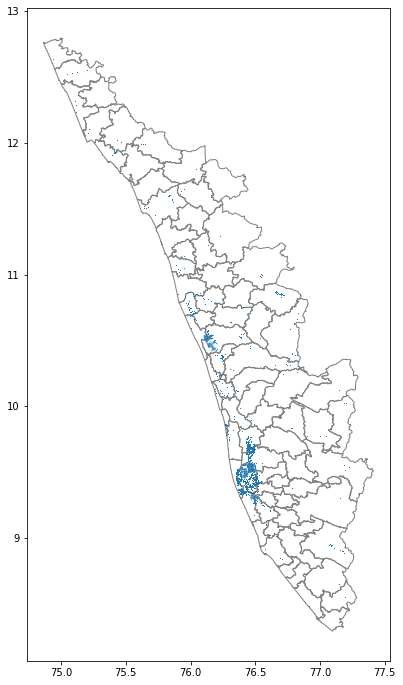

In [5]:
#plot the two layers on top of each other
fig, ax = plt.subplots(figsize = (20,12))
taluk.plot(ax = ax, color = 'none', edgecolor = 'grey')
flood_otsu.plot(ax = ax);

In [6]:
flood_otsu.head()

,count,label,geometry
0,1,1,"POLYGON ((74.92002 12.63491, 74.92002 12.63547..."
1,1,1,"POLYGON ((74.92059 12.63377, 74.92059 12.63434..."
2,6,1,"POLYGON ((74.92115 12.63377, 74.92172 12.63377..."
3,3,1,"POLYGON ((74.92172 12.62981, 74.92172 12.63151..."
4,3,1,"POLYGON ((74.93362 12.60148, 74.93362 12.60318..."


In [7]:
#import method 1 to compare
flood = gpd.read_file(r'C:\Users\nw431\OneDrive - University of Exeter\Individual Project\Shape Files\flooded_vec.shp')

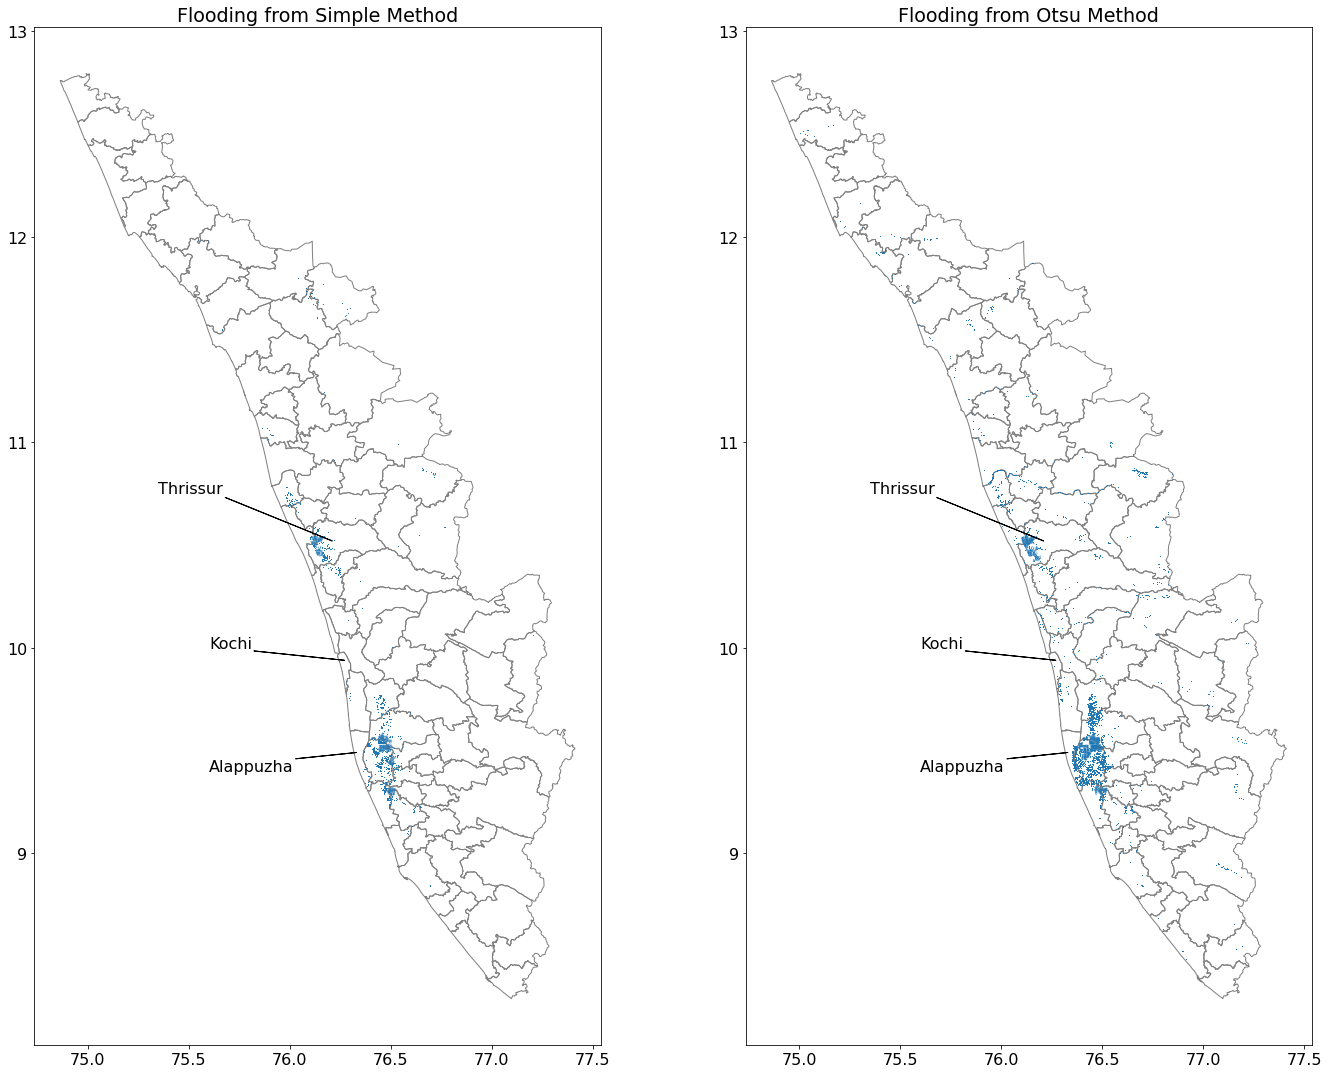

In [16]:
#plot the two layers on top of each other
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20,15))
plt.rcParams['font.size'] = '16'
fig.tight_layout(h_pad=0)
taluk.plot(ax = ax1, color = 'none', edgecolor = 'grey')
flood.plot(ax = ax1)

ax1.title.set_text('Flooding from Simple Method')
ax1.annotate('Kochi',
xy=(76.2705, 9.939), xytext=(75.6, 10), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax1.annotate('Alappuzha',
xy=(76.33, 9.49), xytext=(75.6, 9.4), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax1.annotate('Thrissur',
xy=(76.21, 10.52), xytext=(75.35, 10.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
taluk.plot(ax = ax2, color = 'none', edgecolor = 'grey')
flood_otsu.plot(ax = ax2);
ax2.title.set_text('Flooding from Otsu Method')
ax2.annotate('Kochi',
xy=(76.2705, 9.939), xytext=(75.6, 10), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax2.annotate('Alappuzha',
xy=(76.33, 9.49), xytext=(75.6, 9.4), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax2.annotate('Thrissur',
xy=(76.21, 10.52), xytext=(75.35, 10.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
plt.show()

In [18]:
import matplotlib.colors as colors

In [19]:
union = gpd.overlay(flood_otsu, taluk, how = 'union')

In [20]:
flooded_taluk_otsu = union.dissolve(by = 'name', aggfunc = 'sum')

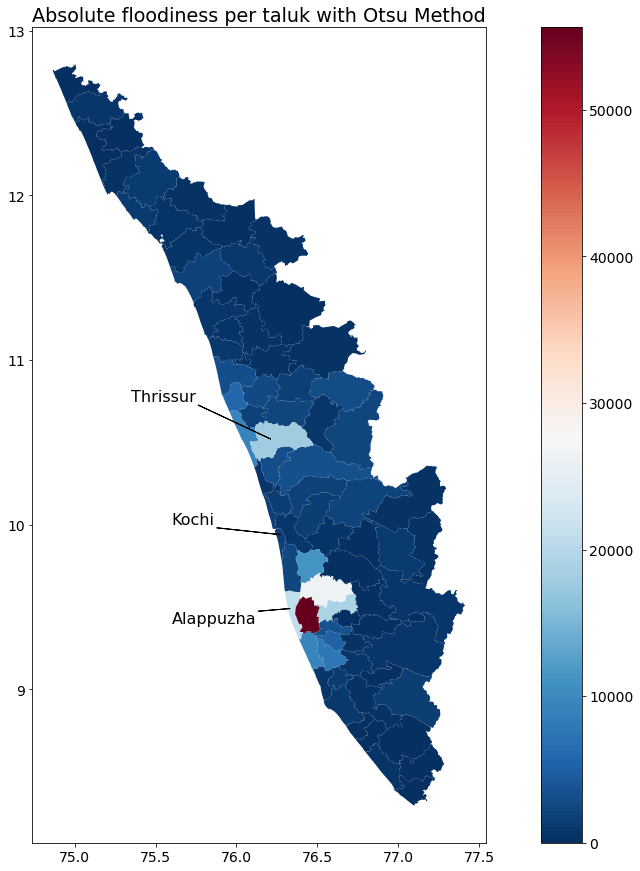

In [25]:
flood_plt = flooded_taluk_otsu.plot(column = 'count', figsize = (20,15), legend = True, cmap = 'RdBu_r')
#plt.scatter(x = [76.2705], y = [9.939], marker = 'X', color = 'green', zorder = 1)
plt.rcParams['font.size'] = '16'
plt.title('Absolute floodiness per taluk with Otsu Method')

plt.annotate('Kochi',
xy=(76.2705, 9.939), xytext=(75.6, 10), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
plt.annotate('Alappuzha',
xy=(76.33, 9.49), xytext=(75.6, 9.4), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))

plt.annotate('Thrissur',
xy=(76.21, 10.52), xytext=(75.35, 10.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
plt.show()

In [27]:
#tidy for export
flooded_taluk_otsu_ex = flooded_taluk_otsu.rename(columns = {'count':'flood_count'})

In [28]:
flooded_taluk_otsu_ex.pop('label')

name
Adoor             12.0
Alathur           43.0
Aluva            164.0
Ambalappuzha     123.0
Chalakkudy       286.0
                 ...  
Vadakara          79.0
Vaikom           184.0
Varkala            1.0
Vellarikkundu     15.0
Vythiri          158.0
Name: label, Length: 77, dtype: float64

In [29]:
flooded_taluk_otsu_ex

,geometry,flood_count
name,,
Adoor,"POLYGON ((76.64588 9.21544, 76.64576 9.21714, ...",667.0
Alathur,"POLYGON ((76.44361 10.69291, 76.44337 10.69320...",665.0
Aluva,"POLYGON ((76.42180 10.11733, 76.42127 10.11708...",1860.0
Ambalappuzha,"POLYGON ((76.38282 9.31062, 76.38275 9.31078, ...",20908.0
Chalakkudy,"POLYGON ((76.27339 10.18135, 76.27292 10.18398...",3374.0
...,...,...
Vadakara,"MULTIPOLYGON (((75.65722 11.52964, 75.65648 11...",558.0
Vaikom,"POLYGON ((76.43287 9.65052, 76.43260 9.65026, ...",11273.0
Varkala,"POLYGON ((76.74892 8.70158, 76.74688 8.70536, ...",20.0


In [30]:
flooded_taluk_otsu

,geometry,count,label
name,,,
Adoor,"POLYGON ((76.64588 9.21544, 76.64576 9.21714, ...",667.0,12.0
Alathur,"POLYGON ((76.44361 10.69291, 76.44337 10.69320...",665.0,43.0
Aluva,"POLYGON ((76.42180 10.11733, 76.42127 10.11708...",1860.0,164.0
Ambalappuzha,"POLYGON ((76.38282 9.31062, 76.38275 9.31078, ...",20908.0,123.0
Chalakkudy,"POLYGON ((76.27339 10.18135, 76.27292 10.18398...",3374.0,286.0
...,...,...,...
Vadakara,"MULTIPOLYGON (((75.65722 11.52964, 75.65648 11...",558.0,79.0
Vaikom,"POLYGON ((76.43287 9.65052, 76.43260 9.65026, ...",11273.0,184.0
Varkala,"POLYGON ((76.74892 8.70158, 76.74688 8.70536, ...",20.0,1.0


In [31]:
flooded_taluk_otsu_ex.to_csv(r'flooded_otsu2.csv')

In [32]:
pop_exposed_otsu = gpd.read_file('pop_exposed_vec.shp')

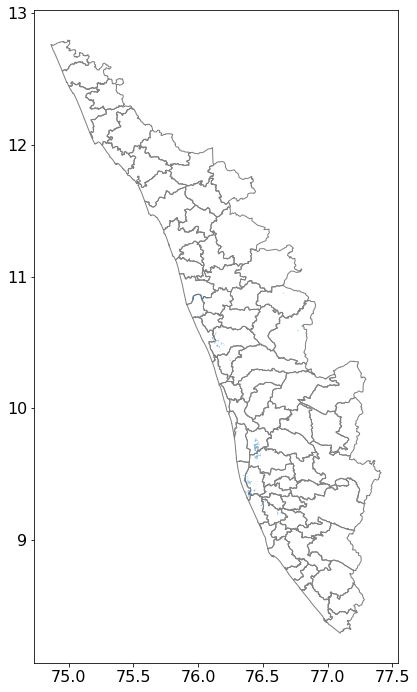

In [33]:
#plot population on top of map
fig, ax = plt.subplots(figsize = (20,12))
taluk.plot(ax = ax, color = 'none', edgecolor = 'grey')
pop_exposed_otsu.plot(ax = ax);

In [34]:
union = gpd.overlay(pop_exposed_otsu, taluk, how = 'union')
pop_bytaluk_otsu = union.dissolve(by = 'name', aggfunc = 'sum')

In [35]:
pop_bytaluk_otsu['label'].sum()

268382.0

In [36]:
pop_bytaluk_otsu

,geometry,count,label
name,,,
Adoor,"POLYGON ((76.84924 9.10286, 76.85173 9.10142, ...",0.0,0.0
Alathur,"POLYGON ((76.58921 10.72768, 76.59016 10.72739...",0.0,0.0
Aluva,"POLYGON ((76.33510 10.12398, 76.33470 10.12443...",0.0,0.0
Ambalappuzha,"POLYGON ((76.39532 9.35769, 76.39422 9.35570, ...",2160.0,18847.0
Chalakkudy,"POLYGON ((76.31124 10.39259, 76.31183 10.39260...",0.0,0.0
...,...,...,...
Vadakara,"MULTIPOLYGON (((75.54171 11.66295, 75.54144 11...",0.0,0.0
Vaikom,"POLYGON ((76.46077 9.67697, 76.46010 9.67682, ...",3616.0,42553.0
Varkala,"POLYGON ((76.74892 8.70158, 76.74688 8.70536, ...",0.0,0.0


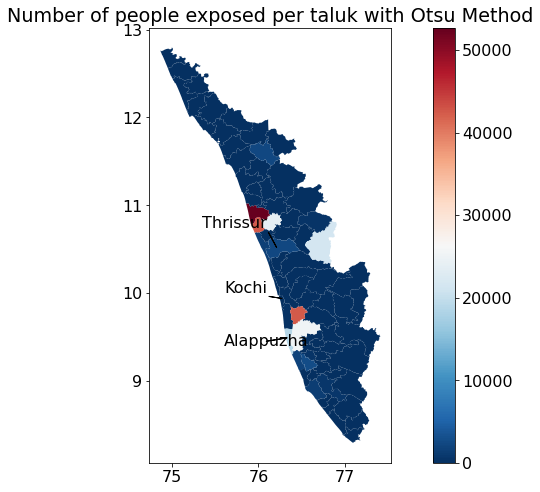

In [37]:
pop_plt = pop_bytaluk_otsu.plot(column = 'label', figsize = (15,8), legend = True, cmap = 'RdBu_r')
plt.rcParams['font.size'] = '16'
plt.title('Number of people exposed per taluk with Otsu Method')

plt.annotate('Kochi',
xy=(76.2705, 9.939), xytext=(75.6, 10), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
plt.annotate('Alappuzha',
xy=(76.33, 9.49), xytext=(75.6, 9.4), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
plt.annotate('Thrissur',
xy=(76.21, 10.52), xytext=(75.35, 10.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))

plt.show()

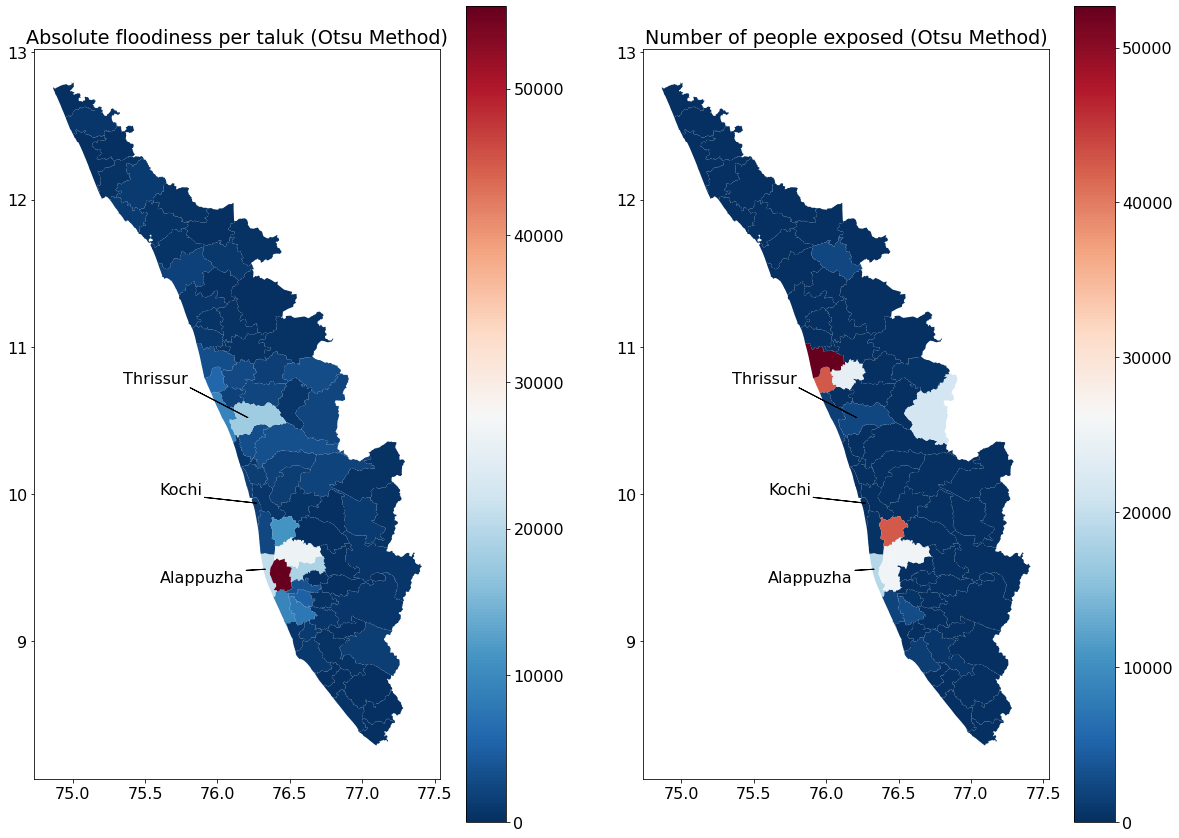

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20,15))
plt.rcParams['font.size'] = '16'
#flood plot
flooded_taluk_otsu.plot(ax = ax1, column = 'count', legend = True, cmap = 'RdBu_r')
ax1.title.set_text('Absolute floodiness per taluk (Otsu Method)')
ax1.annotate('Kochi',
xy=(76.2705, 9.939), xytext=(75.6, 10), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax1.annotate('Alappuzha',
xy=(76.33, 9.49), xytext=(75.6, 9.4), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax1.annotate('Thrissur',
xy=(76.21, 10.52), xytext=(75.35, 10.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))

#population plot
pop_bytaluk_otsu.plot(ax = ax2, column = 'label', legend = True, cmap = 'RdBu_r')
ax2.title.set_text('Number of people exposed (Otsu Method)')
ax2.annotate('Kochi',
xy=(76.2705, 9.939), xytext=(75.6, 10), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax2.annotate('Alappuzha',
xy=(76.33, 9.49), xytext=(75.6, 9.4), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax2.annotate('Thrissur',
xy=(76.21, 10.52), xytext=(75.35, 10.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))

plt.show()